In [15]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter
import datetime
import os

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

plt.rcParams['figure.figsize'] = (10, 4)

In [16]:
if os.uname().nodename.lower().find('eemmmbp') != -1:
    imagesDir = '/home/pvb/Dropbox/Oceanografia/Analisis/SSTGlobalAnalysis/images'
elif os.uname().nodename.lower().find('rossby') != -1:
    imagesDir = '/home/pvb/Analisis/SSTGlobalAnalysis/images'
    dataDir = '/home/pvb/Analisis/SSTGlobalAnalysis/data'

In [17]:
#titulo_short = 'GO'
#titulo =  'Oceano Global'

titulo_short = 'NAtl'
titulo =  'Atlantico Norte'

In [18]:
FileIn =  './data/sstLD_anom_'+titulo_short+'.nc'
FileOut = './images/map_sstd_anom_'+titulo_short+'.png'
Title  = 'Anomalia de temperatura superficial en el '+ titulo

In [19]:
data = xr.open_dataset(FileIn)
sst = data.sst

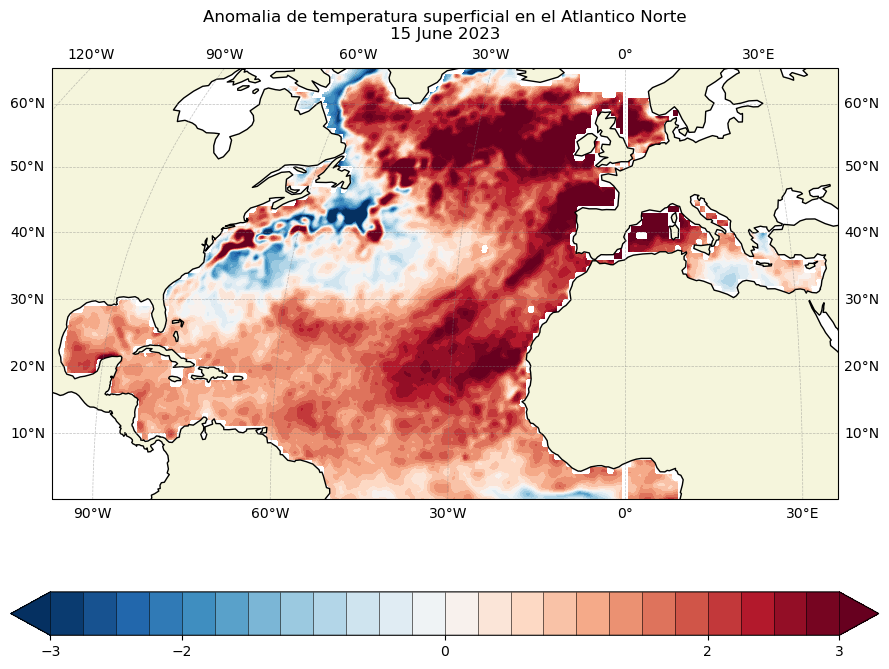

In [20]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

land = cartopy.feature.NaturalEarthFeature('physical', 
                'land', edgecolor='k', scale = '110m' ,
                facecolor=cfeature.COLORS['land'])

ax.add_feature(land, facecolor='beige')
ax.add_feature(cfeature.LAND)
    
cm=ax.contourf(sst.lon,sst.lat,sst, levels=np.arange(-3,3.1,0.25), 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = -3,vmax = 3,extend='both')

#ax.contour(sst.lon,sst.lat,sst, levels=[2,3], colors='k',
#               transform=ccrs.PlateCarree())

cbar=fig.colorbar(cm,ax=ax, location='bottom',
                  shrink=.8, ticks=[-3,-2,0,2,3], 
                  drawedges=True)

ax.gridlines(draw_labels=True, linewidth=.5, 
             color='gray', alpha=0.5, linestyle='--')

ax.set_title(Title + '\n' +
             sst.time.dt.strftime("%d %B %Y").values);

plt.savefig(FileOut)

(array([  29.,   25.,   32.,   47.,   64.,   72.,  107.,  125.,  162.,
         230.,  307.,  316.,  377.,  450.,  518.,  783., 1027., 1387.,
        1651., 1807., 2092., 2574., 3136., 3739., 5018., 6106., 5638.,
        4911., 4656., 4289., 3247., 2941., 2666., 1713., 1369., 1174.,
         853.,  653.,  446.]),
 array([-4.        , -3.79487179, -3.58974359, -3.38461538, -3.17948718,
        -2.97435897, -2.76923077, -2.56410256, -2.35897436, -2.15384615,
        -1.94871795, -1.74358974, -1.53846154, -1.33333333, -1.12820513,
        -0.92307692, -0.71794872, -0.51282051, -0.30769231, -0.1025641 ,
         0.1025641 ,  0.30769231,  0.51282051,  0.71794872,  0.92307692,
         1.12820513,  1.33333333,  1.53846154,  1.74358974,  1.94871795,
         2.15384615,  2.35897436,  2.56410256,  2.76923077,  2.97435897,
         3.17948718,  3.38461538,  3.58974359,  3.79487179,  4.        ]),
 <BarContainer object of 39 artists>)

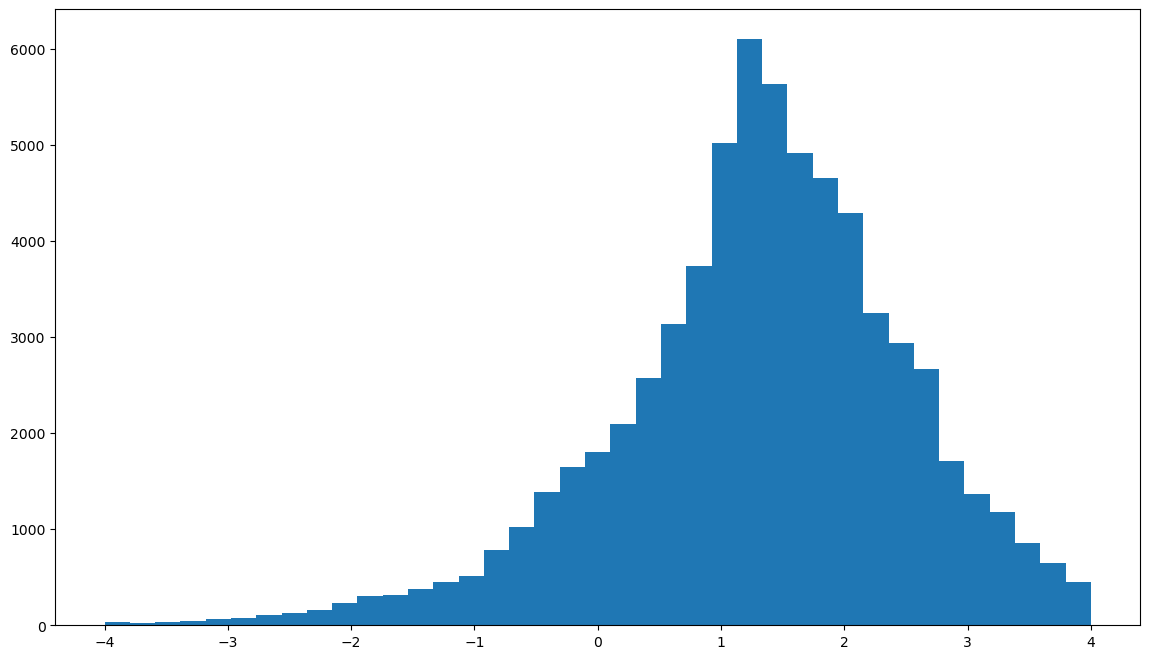

In [21]:
fig , ax = plt.subplots(figsize=(14,8))
ax.hist(sst.values.flatten(),np.linspace(-4, 4, 40))

In [39]:
l=

(array([3.10000e+01, 1.25000e+02, 1.07400e+03, 4.01320e+04, 4.75140e+05,
        1.16627e+05, 3.19800e+03, 4.34000e+02, 6.20000e+01, 1.20000e+01]),
 array([-8.00818062, -6.15090799, -4.29363537, -2.43636274, -0.57909012,
         1.27818251,  3.13545513,  4.99272776,  6.85000038,  8.70727348,
        10.56454563]),
 <BarContainer object of 10 artists>)

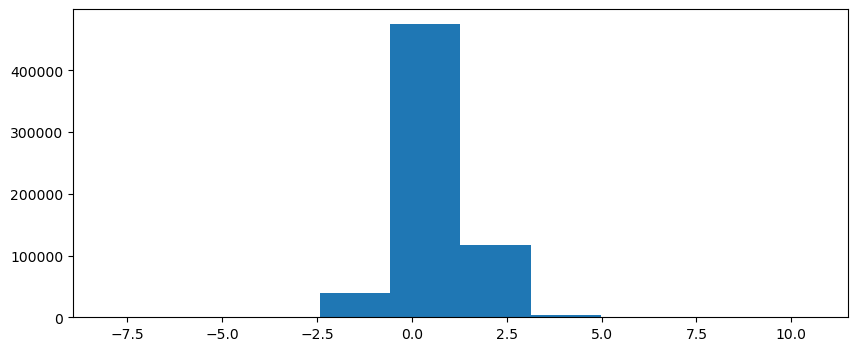

In [45]:
plt.hist(l)

In [44]:
sst

<xarray.DataArray 'sst' (lat: 640, lon: 1440)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [-2.389091, -2.451818, -2.492727, ..., -2.060909, -2.182727, -2.295455],
       [-2.143636, -2.197273, -2.259091, ..., -1.864545, -1.967273, -2.07    ],
       [-2.005455, -2.082727, -2.157273, ..., -1.706364, -1.808182, -1.915455]],
      dtype=float32)
Coordinates:
    time       datetime64[ns] 2023-05-17
  * lat        (lat) float32 -79.88 -79.62 -79.38 -79.12 ... 79.38 79.62 79.88
  * lon        (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
    dayofyear  int64 137